## This script randomly generates flow rates to be used between facilities in a QAP
You can select whether the random flow rates of materials between two given facilities follows a uniform distribution or a gaussian (normal) distribution
Data is structured in the same way as distances, e.g. the flow rate between facilties m and n is at i = m, j = n
- Matrix is symmetrical as before

Note that a flow rate at an index, e.g. 1, 8, DOES NOT correspond to a specific location or distance relationship--the facilities must be assigned to appropriate locations; this is the whole point of the problem

In [147]:
import numpy as np
import csv
import random
import matplotlib.pyplot as plot

In [148]:
# Crucial variables
maxFlow = 10

# If want uniform:
#distribution = 0
# If want gaussian:
distribution = 1

In [149]:
# Import locations to get # locations
reader = csv.reader(open("locations.csv", "r"), delimiter=",")
x = list(reader)
locations = np.array(x).astype("float")
nLocations = len(locations)
print("Number of locations: " + str(nLocations))

Number of locations: 10


In [150]:
# Generate empty array
flows = np.empty((nLocations,nLocations))
for i in range(nLocations):
    for j in range(nLocations):
        if distribution == 0:
            flow = random.uniform(0,maxFlow)
        elif distribution == 1:
            flow = np.random.normal(0,maxFlow/5)
        else:
            raise ValueError("Select a valid distribution type up top")
        
        flows[i,j] = flow
        flows[j,i] = -flow

In [151]:
# Write to csv
np.savetxt('flows.csv', flows, delimiter=',') 

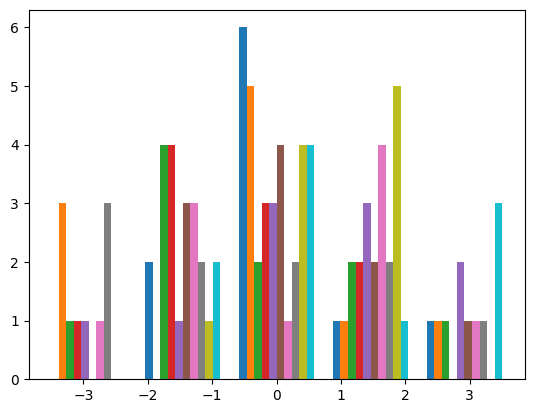

In [152]:
# Plot to confirm distribution
plot.hist(flows,bins=5)
plot.show()